# Notebook for analysis of engineering-colleges-in-india

In [476]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from pathlib import Path

In [198]:
# reading the dataset
engg_colleges = pd.read_csv("../datasets/indian_universities.csv")

In [199]:
# getting the shape of the dataset
engg_colleges.shape

(5440, 15)

In [200]:
engg_colleges.describe()

,Total Student Enrollments,Total Faculty,Established Year,Rating,Average Fees
count,4.437000e+03,5279.000000,5339.000000,327.000000,5.440000e+03
mean,1.915446e+03,96.739345,2000.425548,3.081896,1.886011e+05
std,1.841858e+04,113.869962,16.203044,0.305166,1.807647e+05
min,1.000000e+00,1.000000,1857.000000,2.010000,1.800000e+02
25%,4.090000e+02,37.000000,1998.000000,3.010000,9.000000e+04
50%,8.120000e+02,69.000000,2007.000000,3.100000,1.590000e+05
75%,1.551000e+03,124.000000,2009.000000,3.235000,2.400000e+05
max,1.035081e+06,2453.000000,2019.000000,3.830000,3.578597e+06


In [201]:
# checking for null values
engg_colleges.isna().sum()

College Name                    0
Genders Accepted               18
Campus Size                  2751
Total Student Enrollments    1003
Total Faculty                 161
Established Year              101
Rating                       5113
University                   1936
Courses                         0
Facilities                     12
City                            0
State                           0
Country                         0
College Type                    1
Average Fees                    0
dtype: int64

In [202]:
# checking for data types of the columns
engg_colleges.dtypes

College Name                  object
Genders Accepted              object
Campus Size                   object
Total Student Enrollments    float64
Total Faculty                float64
Established Year             float64
Rating                       float64
University                    object
Courses                       object
Facilities                    object
City                          object
State                         object
Country                       object
College Type                  object
Average Fees                 float64
dtype: object

In [203]:
engg_colleges.head()

,College Name,Genders Accepted,Campus Size,Total Student Enrollments,Total Faculty,Established Year,Rating,University,Courses,Facilities,City,State,Country,College Type,Average Fees
0,National Institute of Technology Rourkela,Co-Ed,647 Acres,4811.0,329.0,2007.0,3.12,NaN,"B.Tech Mechanical Engineering, B.Tech Computer...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Rourkela,Odisha,India,Public/Government,350600.000000
1,Visvesvaraya National Institute of Technology ...,Co-Ed,215 Acres,1071.0,192.0,2007.0,NaN,NaN,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Nagpur,Maharashtra,India,Public/Government,273596.666667
2,Netaji Subhas University of Technology,Co-Ed,145 Acres,3759.0,101.0,2018.0,NaN,NaN,"B.Tech Computer Engineering, B.Tech Electronic...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",New Delhi,Delhi,India,Public/Government,352320.000000
3,Birla Institute of Technology,Co-Ed,980 Acres,4506.0,284.0,1955.0,NaN,NaN,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Ranchi,Jharkhand,India,Private,596686.046512
4,International Institute of Information Technology,Co-Ed,66 Acres,1721.0,85.0,2001.0,3.05,NaN,"B.Tech Computer Science and Engineering, M.Tec...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Hyderabad,Telangana,India,Private,756666.666667


## Performing column by column data analysis

### 1. College Name : Some of the Colleges are repeated. In our database we need to make sure that we are storing unique colleges

In [204]:
# checking for null values
engg_colleges["College Name"].isna().sum()

0

In [205]:
# getting the total number of colleges which are present
len(engg_colleges["College Name"])

5440

In [206]:
# getting the total number of unique colleges which are present
len(set(engg_colleges["College Name"]))

4830

In [207]:
# getting the count of repeated colleges 
college_count = {}

# storing the count of corresponding colleges in the dictionary
for college in list(engg_colleges["College Name"]):
    if college not in college_count.keys():
        college_count[college] = 1
    else: 
        college_count[college] += 1

# getting the list of repeated colleges
repeated_colleges = []

for key, value in college_count.items():
    if value > 1:
        repeated_colleges.append(key)

f"There are {len(repeated_colleges)} repeated colleges which are available in the dataset"

'There are 205 repeated colleges which are available in the dataset'

In [208]:
# dropping the duplicate rows from the dataset
engg_colleges.drop_duplicates(subset=['College Name'], inplace=True)
engg_colleges.shape

(4830, 15)

### 2. Genders Accepted : This can be a new database table where in we will store the unique genders accepted. Tomorrow if any new type of gender gets added, then we can easily update this table and add the new gender

In [209]:
# checking for null values
engg_colleges["Genders Accepted"].isna().sum()

17

In [210]:
# getting the total number of unique genders which are present
set(engg_colleges["Genders Accepted"])

{'Co-Ed', 'Co-Ed5666656', 'Female', 'Male', nan}

In [211]:
# replacing the Co-Ed5666656 by Co-Ed
engg_colleges["Genders Accepted"].replace("Co-Ed5666656", "Co-Ed", inplace=True)

In [212]:
# getting the total number of unique genders which are present
# We can see that currently we have 4 types of genders in our dataset
set(engg_colleges["Genders Accepted"])

{'Co-Ed', 'Female', 'Male', nan}

<AxesSubplot:xlabel='Genders Accepted', ylabel='count'>

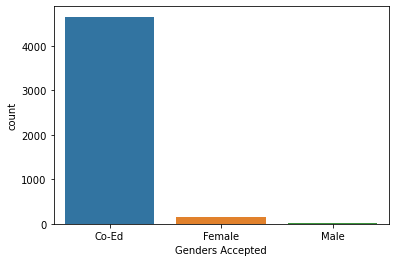

In [322]:
# getting the count of different genders accepted}
sns.countplot(data=engg_colleges, x=engg_colleges["Genders Accepted"])

### 3. Campus Size : Need to clean the column by removing the word acre after every value and convert the same into numerical column

In [213]:
# checking for null values
engg_colleges["Campus Size"].isna().sum()

2458

In [228]:
# replacing Acres / Acre with blank string and stripping out the spaces
engg_colleges["Campus Size"] = engg_colleges["Campus Size"].str.replace("Acres", "")
engg_colleges["Campus Size"] = engg_colleges["Campus Size"].str.replace("Acre", "")
engg_colleges["Campus Size"] = engg_colleges["Campus Size"].str.strip()

In [233]:
# converting the data types of the Campus size to float
engg_colleges["Campus Size"] = engg_colleges["Campus Size"].astype('float')

In [240]:
# checking the data type for Campus Size
engg_colleges["Campus Size"].dtype

dtype('float64')

In [257]:
# getting the overview of the data
engg_colleges["Campus Size"].describe()

count     2372.000000
mean        71.309865
std        358.368825
min          0.000000
25%         11.000000
50%         23.000000
75%         50.000000
max      16000.000000
Name: Campus Size, dtype: float64

### 4. Total Student Enrollments : This column is already clean and contains some null values

In [234]:
# checking for null values
engg_colleges["Total Student Enrollments"].isna().sum()

903

In [239]:
# checking the data type for Total Student Enrollments 
engg_colleges["Total Student Enrollments"].dtype

dtype('float64')

In [258]:
# getting the overview of the data
engg_colleges["Total Student Enrollments"].describe()

count    3.927000e+03
mean     2.048035e+03
std      1.957238e+04
min      1.000000e+00
25%      4.150000e+02
50%      8.360000e+02
75%      1.610500e+03
max      1.035081e+06
Name: Total Student Enrollments, dtype: float64

### 5. Total Faculty : This column is already clean and contains some null values

In [241]:
# checking for null values
engg_colleges["Total Faculty"].isna().sum()

143

In [242]:
# checking the data type for Total Faculty
engg_colleges["Total Faculty"].dtype

dtype('float64')

In [260]:
# getting the overview of the data
engg_colleges["Total Faculty"].describe()

count    4687.000000
mean      102.620226
std       118.255767
min         1.000000
25%        42.000000
50%        74.000000
75%       129.000000
max      2453.000000
Name: Total Faculty, dtype: float64

<AxesSubplot:xlabel='Total Faculty', ylabel='Count'>

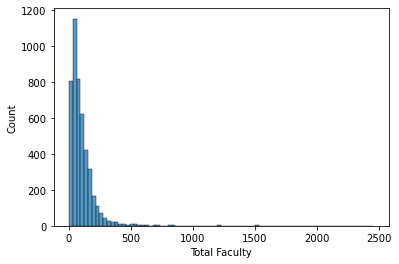

In [343]:
sns.histplot(data=engg_colleges["Total Faculty"], bins=80)

### 6. Established Year: This column is already clean and contains some null values

In [243]:
# checking for null values
engg_colleges["Established Year"].isna().sum()

95

In [245]:
# checking the data type for Established Year
engg_colleges["Established Year"].dtype

dtype('float64')

In [262]:
# getting the overview of the data
engg_colleges["Established Year"].describe()

count    4735.000000
mean     2000.954382
std        15.723504
min      1857.000000
25%      1999.000000
50%      2007.000000
75%      2009.000000
max      2019.000000
Name: Established Year, dtype: float64

<AxesSubplot:xlabel='Established Year', ylabel='Count'>

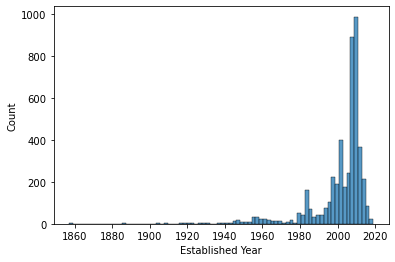

In [344]:
sns.histplot(data=engg_colleges["Established Year"], bins=80)

### 7. Rating: This column has almost all null values and has required data type

In [248]:
# checking for null values
engg_colleges["Rating"].isna().sum()

4510

In [249]:
# checking the data type for Rating
engg_colleges["Rating"].dtype

dtype('float64')

<AxesSubplot:xlabel='Rating', ylabel='Rating'>

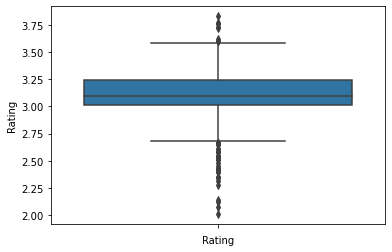

In [285]:
plt.xlabel("Rating")
sns.boxplot(data=engg_colleges["Rating"], y=engg_colleges["Rating"])

### 8. University: This column can be normalized into a different table and contains some null values

In [250]:
# checking for null values.
engg_colleges["University"].isna().sum()

1640

In [288]:
# getting the count of unique universities
f"There are {len(set(list(engg_colleges['University'])))} unique universities present"

'There are 185 unique universities present'

In [289]:
# getting the list of unique universities 
set(list(engg_colleges['University']))

{'APJ Abdul Kalam Technological University, Thiruvananthapuram',
 'Acharya NG Ranga Agricultural University, Guntur',
 'Acharya Nagarjuna University, Guntur',
 'Al Falah University, Faridabad',
 'Alliance University, Bangalore',
 'Amity University, Noida',
 'Amrita Vishwa Vidyapeetham, Coimbatore',
 'Andhra University, Visakhapatnam',
 'Anna University, Chennai',
 'Annamalai University, Annamalai Nagar',
 'Ansal University, Gurgaon',
 'Arni University, Kathgarh',
 'Aryabhatta Knowledge University, Patna',
 'Assam Don Bosco University, Guwahati',
 'Assam Science and Technology University, Guwahati',
 'Assam University, Silchar',
 'Atmiya University, Rajkot',
 'Baddi University of Emerging Sciences and Technology, Baddi',
 'Bangalore University, Bangalore',
 'Barkatullah University, Bhopal',
 'Bhabha University, Bhopal',
 'Bharati Vidyapeeth, Pune',
 'Bhupendra Narayan Mandal University, Madhepura',
 'Biju Patnaik University of Technology, Rourkela',
 'Bikaner Technical University, Bikan

<AxesSubplot:xlabel='count', ylabel='University'>

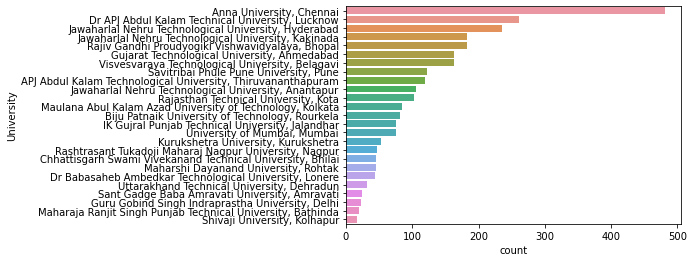

In [307]:
# plotting the top 25 university counts
sns.countplot(data=engg_colleges, y=engg_colleges["University"], order=engg_colleges.University.value_counts().iloc[:25].index)

### 9. Courses : This column contains comma separated values of all the courses that the specific university offers. This can be normalized into a different table and corresponding course values can be stored for specific college. 

In [536]:
engg_colleges["Courses"].isna().sum()

0

In [539]:
# splitting the comma separated courses 
courses = engg_colleges["Courses"].str.split(", ")

course_set = set()

# adding the unique courses in the course set.
for course_list in courses:
    for course in course_list:
        course_set.add(course)
        
course_set

{'Ph.D Geoinformatics',
 'M.Sc Agricultural Plant Breeding',
 'MA Telugu Language Literature and Translation',
 'BA Photography Digital Imaging',
 'PGD in Television and Radio Journalism Production',
 'B.Des Interaction Design',
 'B.Tech CSE Specialization in Cyber Forensics',
 'Ph.D Resource Management',
 'B.Sc and M.Sc Biotechnology Integrated',
 'M.Tech Information Technology',
 'M.Tech Infrastructure Engineering and Technology',
 'Post Graduate Diploma in Insurance Management',
 'M.Pharma Hospital Administration',
 'M.Tech Civil Engineering with Specialization in Environmental Engineering',
 'Diploma in mechanical engineering(auto)',
 'MPA Kuchipudi Dance',
 'M.Tech Structural Engineering and Construction Management',
 'B.Tech and M.Tech Converging Technologies Integrated',
 'PG Diploma in Kshar Karma',
 'MA Arts and Aesthetics',
 'M.Sc Agricultural Extension and Communication',
 'B.Tech Chemical and Electrochemical Engineering',
 'B.Optom Clinical Optometry',
 'BCA UIx',
 'LLM Mer

### 10. Facilities : This column contains comma separated values of all the Facilities that a particular college offers. This can be normalized into a different table and the corresponding values can be stored for specific college. 

In [377]:
# getting the count of null values
engg_colleges["Facilities"].isna().sum()

12

In [378]:
# extracting the facilities for all the colleges
facilities = engg_colleges["Facilities"]

In [386]:
facility_dict = {}

for college_facility in facilities:
    if type(college_facility) != str:
        continue
        
    facility_list = college_facility.split(", ")
    for facility in facility_list:
        if facility not in facility_dict.keys():
            facility_dict[facility] = 1
        else:
            facility_dict[facility] += 1

facility_dict

{'Boys Hostel': 3738,
 'Girls Hostel': 3805,
 'Gym': 2594,
 'Library': 4798,
 'Sports': 4365,
 'Cafeteria': 3887,
 'Medical/Hospital': 3238,
 'Wifi': 2190,
 'IT Infrastructure': 4739,
 'Laboratories': 4232,
 'Swimming Pool': 182,
 'Convenience Store': 688,
 'Alumni Associations': 2408,
 'Guest Room': 1758,
 'Banks Facilities': 1134,
 'Auditorium': 3321,
 'Transport': 3108,
 'Classrooms': 354,
 'Parking Facility': 343,
 'Moot Court': 16}

In [432]:
# sorting the facility dictionary
sorted_facility_list = sorted(facility_dict.items(), key=lambda x:x[1], reverse=True)

# extracting the keys and values
keys = [x[0] for x in sorted_facility_list]
values = [x[1] for x in sorted_facility_list]

<AxesSubplot:>

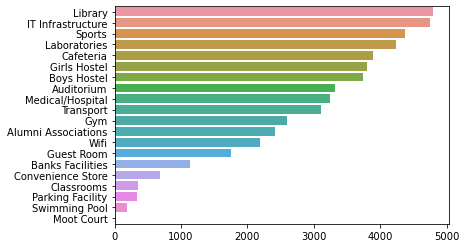

In [433]:
# drawing the bar plot
sns.barplot(x=values, y=keys)

### 11. City : This column contains city values for the corresponding colleges, and can be normalized into a different table.  

In [252]:
# checking for null values
engg_colleges["City"].isna().sum()

0

In [292]:
# getting the count of unique cities
f"There are {len(set(list(engg_colleges['City'])))} unique cities present"

'There are 2137 unique cities present'

In [293]:
# getting the list of unique cities
set(list(engg_colleges['City']))

{'Nathusari Chopta',
 'Pethappampatti',
 'Dameriguda',
 'Vitthal Udyognagar INA',
 'Mohali',
 'Bangarrajupeta',
 'Khatav',
 'Sarola Baddi',
 'Kanera',
 'Budbud',
 'Rajkot',
 'Kammasandra',
 'Mehsana',
 'Maraimalai Nagar',
 'Kanapalli',
 'Chordi',
 'Anagahalli',
 'Phagi',
 'Achipur',
 'Panipat Taraf Ansar',
 'Lalgadi Malakpet',
 'Hulkoti',
 'Thoothukudi (Tuticorin)',
 'Patha Tiruvuru',
 'Saidapuram',
 'Edulabad',
 'Kannur',
 'Beed',
 'Rampachodavaram',
 'Satara',
 'Paalkulam',
 'Ariyavoor-Ukkadaiariyavoor',
 'Julana',
 'Bardoli',
 'Mangalpalle',
 'Seshanchavadi',
 'Kuberpur',
 'Kallakurichi',
 'Gadag',
 'Peddanjimedu',
 'Matar',
 'Omalur',
 'Israna',
 'Bungal',
 'Gajawadi',
 'Punjaithuraiyampalayam',
 'Sagoni Kalan',
 'Lalsot',
 'Nemalur',
 'Kotha Kuppenkuntla',
 'Wardha',
 'Pohabagan',
 'Bijulikhaman',
 'Aravakurichi',
 'Chollangi Peta',
 'Shindoli',
 'Kugawan',
 'Avaravelli R.F.',
 'Rudrapur',
 'Gohana',
 'Chiplun',
 'Sangareddy',
 'Save',
 'Palani',
 'Jewar Banger',
 'Mannam',
 'Then

<AxesSubplot:xlabel='count', ylabel='City'>

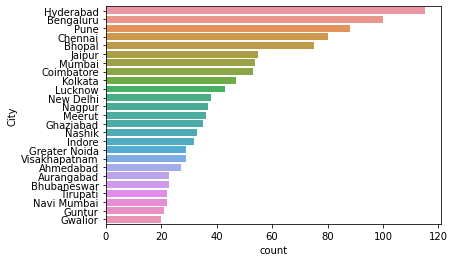

In [309]:
# Getting the top 25 cities containing most universities
sns.countplot(data=engg_colleges, y=engg_colleges["City"], order=engg_colleges.City.value_counts().iloc[:25].index)

### 12. State : This column contains state values for the corresponding colleges, and can be normalized into a different table.

In [294]:
# checking for null values
engg_colleges["State"].isna().sum()

0

In [296]:
# getting the count of unique cities
f"There are {len(set(list(engg_colleges['State'])))} unique states present"

'There are 34 unique states present'

In [297]:
# getting the list of unique States
set(list(engg_colleges['State']))

{'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

<AxesSubplot:xlabel='count', ylabel='State'>

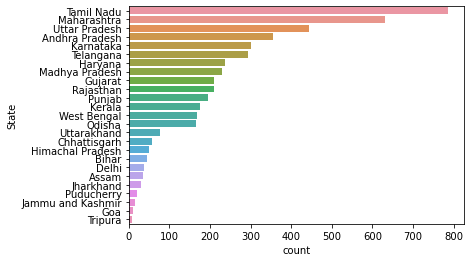

In [314]:
# top 25 states containing most universities
sns.countplot(data=engg_colleges, y=engg_colleges["State"], order=engg_colleges.State.value_counts().iloc[:25].index)

### 13. Country : This column contains only 1 value i.e India. We can create a new table to scale up the system and accomodate new countries

In [315]:
# checking for null values
engg_colleges["Country"].isna().sum()

0

In [317]:
# getting the count of unique country
f"There is {len(set(list(engg_colleges['Country'])))} unique country present"

'There is 1 unique country present'

In [323]:
# getting the list of unique Country
set(list(engg_colleges['Country']))

{'India'}

### 14. College Type : This column contains different college types and can be normalized to create a new table

In [325]:
# checking for null values
engg_colleges["College Type"].isna().sum()

1

In [327]:
# getting the count of unique college types
f"There are {len(set(list(engg_colleges['College Type'])))} unique college types present"

'There are 3 unique college types present'

In [328]:
# getting the list of unique college types
set(list(engg_colleges['College Type']))

{'Private', 'Public/Government', nan}

<AxesSubplot:xlabel='College Type', ylabel='count'>

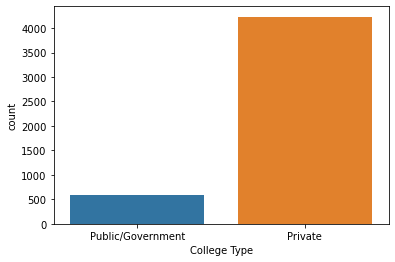

In [330]:
# count plot for colleges
sns.countplot(data=engg_colleges, x=engg_colleges["College Type"])

### 15. Average Fees : This column contains average fees for the colleges.

In [332]:
# checking for null values
engg_colleges["Average Fees"].isna().sum()

0

In [333]:
# getting the overview of the data
engg_colleges["Average Fees"].dtype

dtype('float64')

In [334]:
engg_colleges["Average Fees"].describe()

count    4.830000e+03
mean     1.945764e+05
std      1.778316e+05
min      3.000000e+02
25%      9.945854e+04
50%      1.600000e+05
75%      2.452497e+05
max      3.578597e+06
Name: Average Fees, dtype: float64

<AxesSubplot:xlabel='Average Fees', ylabel='Count'>

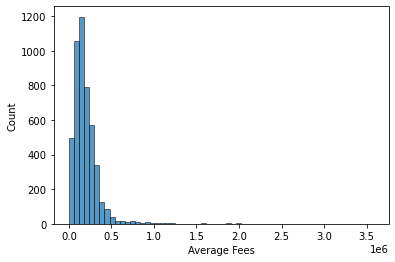

In [342]:
sns.histplot(data=engg_colleges["Average Fees"], bins=60)